In [5]:
import numpy as np
import pandas as pd
from random import choice
#from pathlib import Path
#import math
#import baumbauen as bb
from phasespace import GenParticle
import tensorflow as tf

import matplotlib.pyplot as plt

import tensorflow_probability as tfp

In [6]:
def bg_mother_mass(min_mass, max_mass, n_events):
    min_mass = tf.cast(min_mass, tf.float64)
    max_mass = tf.cast(max_mass, tf.float64)
    
    kstar_width = 50.0
    kstar_mass = 1500.0
    
    kstar_width_cast = tf.cast(kstar_width, tf.float64)
    kstar_mass_cast = tf.cast(kstar_mass, dtype=tf.float64)

    kstar_mass = tf.broadcast_to(kstar_mass_cast, shape=(n_events,))
    if kstar_width > 0:
        kstar_mass = tfp.distributions.TruncatedNormal(loc=kstar_mass,scale=kstar_width_cast,low=min_mass,high=max_mass).sample()
        #kstar_mass = tfp.distributions.Uniform(low=min_mass, high=max_mass).sample()
   
    return kstar_mass


In [7]:
num_max_bg = 3
prob = 0.5
n_events = 10000

# create background tensors with -1s, as it is planned to randomize how many bg particles are used
bg_leaves = np.full((n_events, num_max_bg, 4), -1.0)
bg_SA = np.full((n_events, num_max_bg), -1)
bg_global_tag = np.chararray((n_events, num_max_bg), itemsize=30)
bg_global_tag[:,:] = "-1"



# phase space part to create the bg particles
bg_parti_names = ['BG_K','BG_pi','BG_gamma']
pi_mass = 140
K_mass = 494
gamma_mass = 0
K_1 = GenParticle(bg_parti_names[0], K_mass)
pi_1 = GenParticle(bg_parti_names[1], pi_mass)
gamma1 = GenParticle(bg_parti_names[2], gamma_mass)

Y = GenParticle('Y', 1500).set_children(K_1, pi_1, gamma1)
weights, particles = Y.generate(n_events=n_events)




# read out the bg particle 4 momenta
leaves_all = np.zeros((num_max_bg, n_events, 4))      
for i in range(num_max_bg):
    leaves_all[i] = particles[bg_parti_names[i]]
leaves_all = leaves_all.swapaxes(0, 1)


In [8]:
leaves_all.shape

(10000, 3, 4)

In [9]:
kaon = leaves_all[:,0]
kaon_p = np.sqrt((kaon[:,0:3]**2).sum(axis=1))

In [10]:
for i in range(5):
    print(kaon[i])
    print(kaon_p[i],'\n')


[-155.18035659  484.80864473 -309.31978897  773.84436221]
595.6501464180983 

[628.4635806  184.02730407   8.63425831 820.33107414]
654.9099718315238 

[-509.44635928  267.90898754  170.37170481  777.41452031]
600.28104783885 

[162.59263756 326.81697329 238.90969639 659.05958976]
436.2608655931363 

[-274.38397282  232.21012216    2.54259627  610.94236239]
359.4642821873877 



In [11]:
pion = leaves_all[:,1]
pion_p = np.sqrt((pion[:,0:3]**2).sum(axis=1))

In [12]:
gamma = leaves_all[:,2]
gamma_p = np.sqrt((gamma[:,0:3]**2).sum(axis=1))

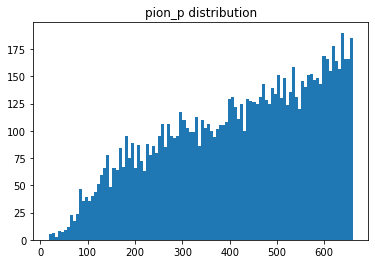

In [13]:
_ = plt.hist(pion_p, bins=100)  # arguments are passed to np.histogram
plt.title("pion_p distribution")
plt.show()

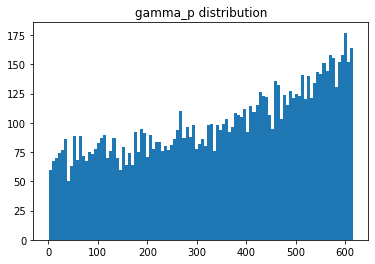

In [14]:
_ = plt.hist(gamma_p, bins=100)  # arguments are passed to np.histogram
plt.title("gamma_p distribution")
plt.show()

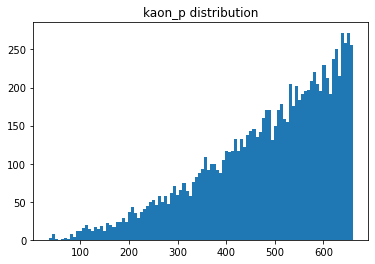

In [15]:
_ = plt.hist(kaon_p, bins=100)  # arguments are passed to np.histogram
plt.title("kaon_p distribution")
plt.show()

array([<AxesSubplot:title={'center':'pion_p'}, xlabel='$p$  / MeV', ylabel='count'>],
      dtype=object)

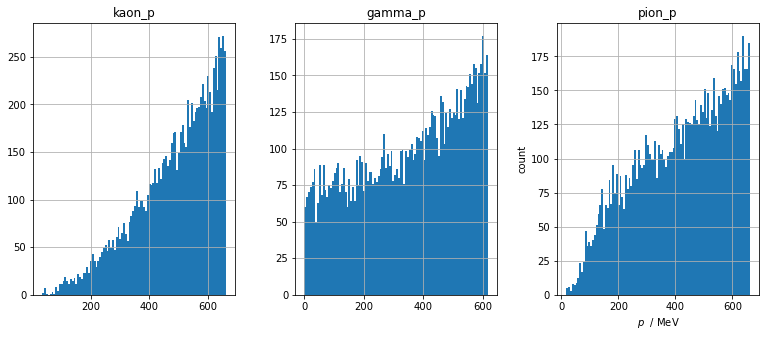

In [33]:
kaon = pd.DataFrame({"kaon_p" : kaon_p})
gamma = pd.DataFrame({"gamma_p" : gamma_p})
pion = pd.DataFrame({"pion_p" : pion_p})

fig, axes = plt.subplots(1, 3,figsize=(13,5))

plt.ylabel('count')
plt.xlabel(r'$p$  / MeV')

kaon.hist('kaon_p', bins=100, ax=axes[0])
gamma.hist('gamma_p', bins=100, ax=axes[1])
pion.hist('pion_p', bins=100, ax=axes[2])


# repeat for bg mother with mass distribution

In [ ]:
# create another mother and events with mass distribution
Y2 = GenParticle('Y2', mass=bg_mother_mass).set_children(K_1, pi_1, gamma1)
pi_2 = GenParticle("pi_2", pi_mass)

mother = GenParticle('mother', 2500).set_children(Y2, pi_2)
weights2, particles2 = mother.generate(n_events=n_events)

# read out the bg particle 4 momenta
leaves_all = np.zeros((num_max_bg, n_events, 4))      
for i in range(num_max_bg):
    leaves_all[i] = particles2[bg_parti_names[i]]
leaves_all = leaves_all.swapaxes(0, 1)

In [ ]:
kaon = leaves_all[:,0]
kaon_p = np.sqrt((kaon[:,0:3]**2).sum(axis=1))

In [ ]:
gamma = leaves_all[:,2]
gamma_p = np.sqrt((gamma[:,0:3]**2).sum(axis=1))

In [ ]:
pion = leaves_all[:,1]
pion_p = np.sqrt((pion[:,0:3]**2).sum(axis=1))

In [ ]:
_ = plt.hist(pion_p, bins=100)  # arguments are passed to np.histogram
plt.title("pion_p distribution")
plt.show()

In [ ]:
_ = plt.hist(gamma_p, bins=100)  # arguments are passed to np.histogram
plt.title("gamma_p distribution")
plt.show()

In [ ]:
_ = plt.hist(pion_p, bins=100)  # arguments are passed to np.histogram
plt.title("kaon_p distribution")
plt.show()